This is a practice notebook for the Seaborn intermediate course on [DataCamp](https://campus.datacamp.com/courses/intermediate-data-visualization-with-seaborn/seaborn-introduction?ex=1)

# Imports and data


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # also for data (diamonds)
import pandas as pd
import numpy as np

In [2]:
data = sns.load_dataset('diamonds', cache=True, data_home=None)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Displot for distribution

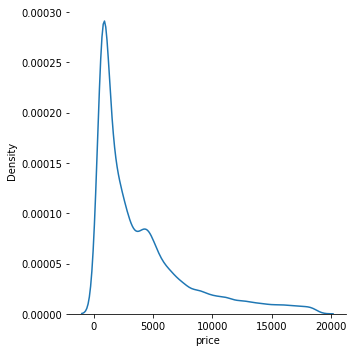

<Figure size 432x288 with 0 Axes>

In [3]:
sns.displot(data['price'], kind = 'kde')
sns.despine(left = True)

plt.show()
plt.clf()

# Regression plot

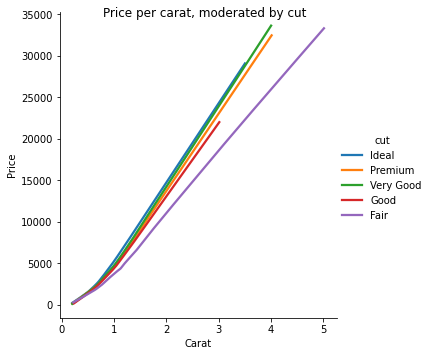

<Figure size 432x288 with 0 Axes>

In [4]:
import statsmodels

# regression plot
sns.set_style()
g = sns.lmplot(data = data, x = 'carat', y = 'price', 
          hue = 'cut', markers = '.', 
          scatter = False, lowess = True, ci = 95)
g.set(xlabel = 'Carat', 
    ylabel = 'Price')
g.fig.suptitle('Price per carat, moderated by cut')

plt.show()
plt.clf()

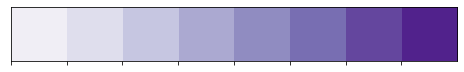

In [5]:
pal = sns.color_palette('Purples', 8)
sns.palplot(pal)

# Multiplotting by combining sns with plt

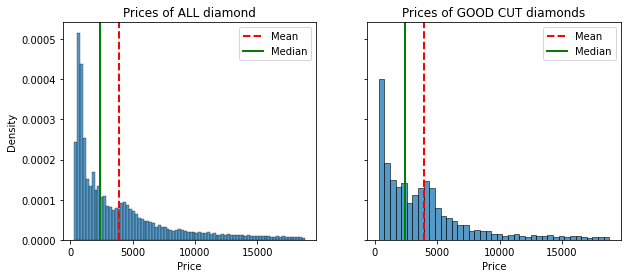

In [7]:
# combining plt and sns


# instantiate plot
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10, 4))

# plot histograms
sns.histplot(data['price'], stat = 'density', ax = ax0)
sns.histplot(data.query('cut == "Good"')['price'], stat = 'density', ax = ax1)

# customise labels
ax0.set(xlabel = 'Price', 
      title = 'Prices of ALL diamond')

ax1.set(xlabel = 'Price', 
      title = 'Prices of GOOD CUT diamonds')

# Add vertical lines for the mean and median
ax0.axvline(x = data['price'].mean(), color = 'r', label = 'Mean', linestyle = '--', linewidth = 2)
ax0.axvline(x = data['price'].median(), color = 'g', label = 'Median', linestyle = '-', linewidth = 2)

ax1.axvline(x = data['price'].mean(), color = 'r', label = 'Mean', linestyle = '--', linewidth = 2)
ax1.axvline(x = data['price'].median(), color = 'g', label = 'Median', linestyle = '-', linewidth = 2)

# display
ax0.legend()
ax1.legend()
plt.show()

# multiple categorical plots


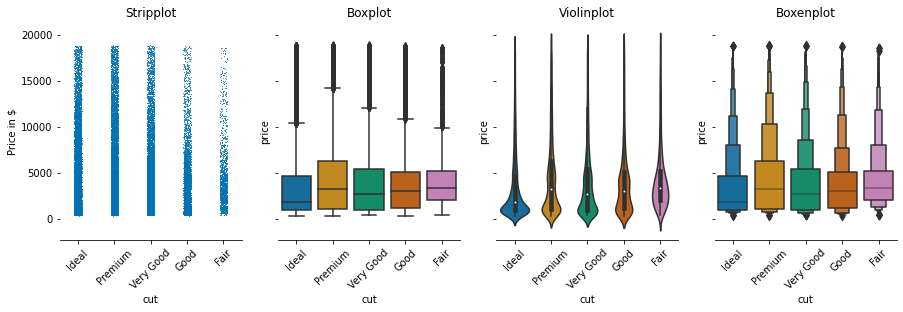

In [8]:

# lazy argumenting
x = data['cut']
y = data['price']

sns.set_palette('colorblind')

# instatiate of plots
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, 
                                        figsize = (15, 4), 
                                         sharey = True)

# plotting
sns.stripplot(x = x, y = y,ax = ax0, size = 1)
sns.boxplot(x = x, y = y, ax = ax1)
sns.violinplot(x = x, y = y, ax = ax2)
sns.boxenplot(x = x, y = y, ax = ax3)


# customisation
ax0.set(title = 'Stripplot', ylabel = 'Price in $', alpha = 0.1)
ax0.tick_params(axis = 'x', labelrotation=45)

ax1.set(title = 'Boxplot')
ax1.tick_params(axis = 'x', labelrotation=45)

ax2.set(title = 'Violinplot')
ax2.tick_params(axis = 'x', labelrotation=45)

ax3.set(title = 'Boxenplot')
ax3.tick_params(axis = 'x', labelrotation=45)


# display
sns.despine(left = True)
plt.show()


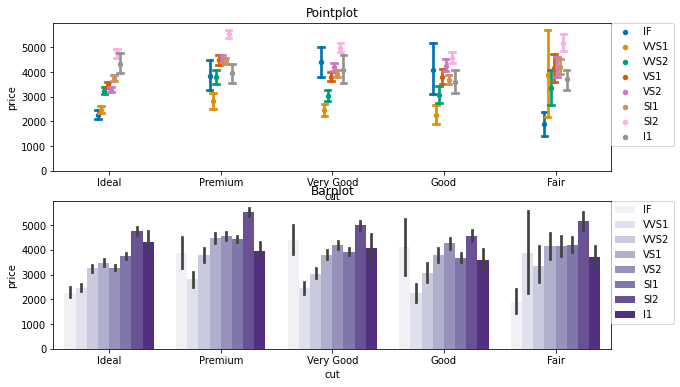

In [35]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=1, 
                              figsize = (10, 6), 
                              sharey = True)

sns.pointplot(data, x = 'cut', y = 'price', hue = 'clarity', 
             join = False, dodge = True, capsize = 0.05, markers = '.', 
             ax = ax0).set_title('Pointplot')


sns.barplot(data, x = 'cut', y = 'price', hue = 'clarity',
             ax = ax1, palette = 'Purples').set_title('Barplot')


ax0.legend(bbox_to_anchor=(1, 1), loc = 2, borderaxespad=0.)
ax1.legend(bbox_to_anchor=(1, 1), loc = 2, borderaxespad=0.)

plt.show()


# Regression plots

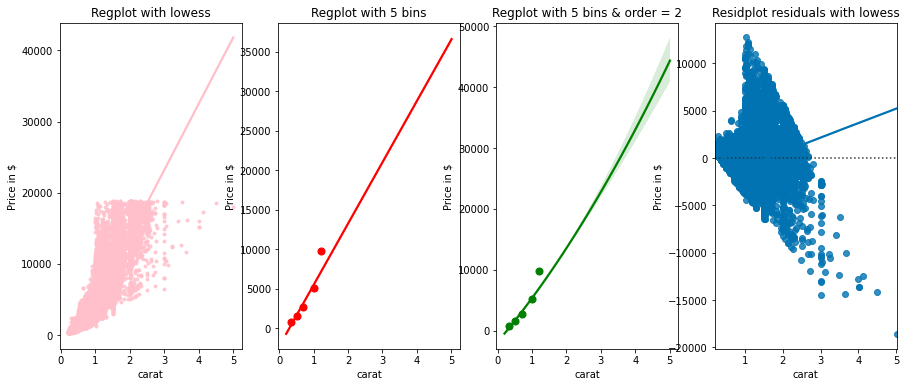

In [62]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, nrows = 1,
                              figsize = (15, 6), 
                              sharey = False)

g0 = sns.regplot(data = data, x = 'carat', y = 'price', 
           marker = '.',  color = 'pink', 
           lowess = True, 
            ax = ax0)
ax0.set(title = 'Regplot with lowess', ylabel = 'Price in $', alpha = 0.1)


g1 = sns.regplot(data = data, x = 'carat', y = 'price', 
           color = 'red', 
            x_bins = 5,
            ax = ax1)
ax1.set(title = 'Regplot with 5 bins', ylabel = 'Price in $', alpha = 0.1)


g2 = sns.regplot(data = data, x = 'carat', y = 'price', 
           color = 'green', 
            x_bins = 5,
            order = 2,
            ax = ax2)
ax2.set(title = 'Regplot with 5 bins & order = 2', ylabel = 'Price in $', alpha = 0.1)


g3 = sns.residplot(data = data, x = 'carat', y = 'price', lowess = True, 
             ax = ax3)
ax3.set(title = 'Residplot residuals with lowess', ylabel = 'Price in $', alpha = 0.1)



plt.show()

# Matrix plots

In [80]:
data_crosstab = (pd.crosstab(data['cut'], data['clarity'], 
           values = data['price'], aggfunc = 'sum')/10000).round(0)
data_crosstab

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,275.0,505.0,847.0,1252.0,1666.0,1607.0,1236.0,63.0
Premium,89.0,174.0,330.0,892.0,1528.0,1593.0,1635.0,81.0
Very Good,118.0,194.0,375.0,675.0,1092.0,1274.0,1048.0,34.0
Good,29.0,42.0,88.0,246.0,417.0,576.0,495.0,35.0
Fair,2.0,7.0,23.0,71.0,109.0,172.0,241.0,78.0


In [83]:
data_crosstab_mean = pd.crosstab(data['cut'], data['clarity'], 
                       values = data['price'], aggfunc = 'mean').round(0)
data_crosstab_mean

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2273.0,2468.0,3250.0,3490.0,3285.0,3752.0,4756.0,4336.0
Premium,3856.0,2831.0,3795.0,4485.0,4550.0,4455.0,5546.0,3947.0
Very Good,4396.0,2459.0,3038.0,3805.0,4216.0,3932.0,4989.0,4078.0
Good,4098.0,2255.0,3079.0,3801.0,4262.0,3690.0,4580.0,3597.0
Fair,1912.0,3871.0,3350.0,4165.0,4175.0,4208.0,5174.0,3704.0


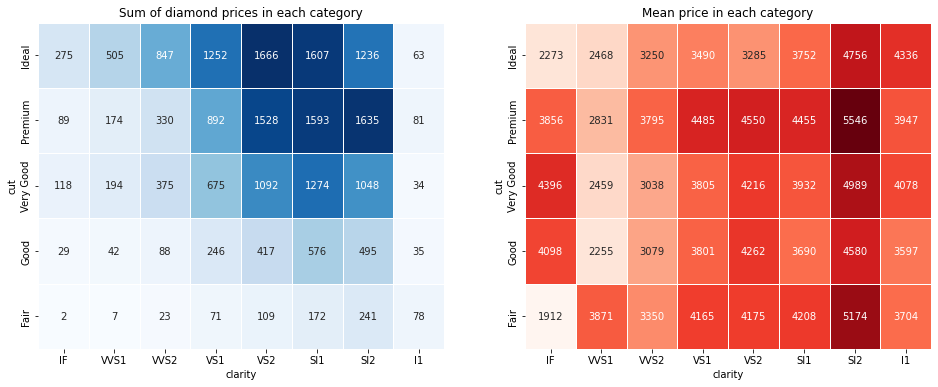

In [100]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize = (16, 6))

sns.heatmap(data = data_crosstab, 
           annot = True, fmt = 'g', cmap = 'Blues', cbar = False, linewidths = .5, 
           ax = ax0).set_title('Sum of diamond prices in each category')

sns.heatmap(data = data_crosstab_mean, 
           annot = True, fmt = 'g', cmap = 'Reds',  cbar = False, linewidths = .5, 
           ax = ax1).set_title('Mean price in each category');



<AxesSubplot: >

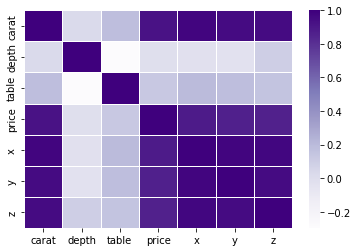

In [104]:
cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sns.heatmap(data[cols].corr(), cmap = 'Purples', linewidths=0.5)

In [38]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
